# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [3]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [6]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [7]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

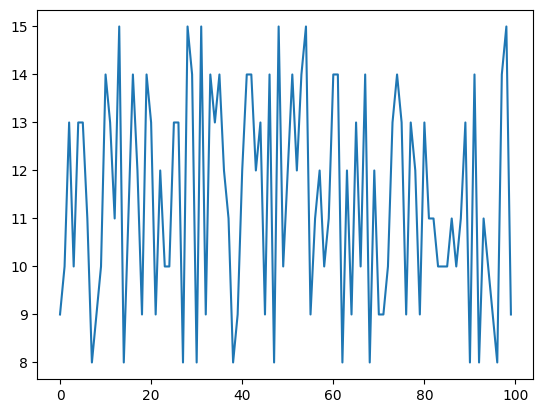

In [8]:
df.國文.plot()

<Axes: >

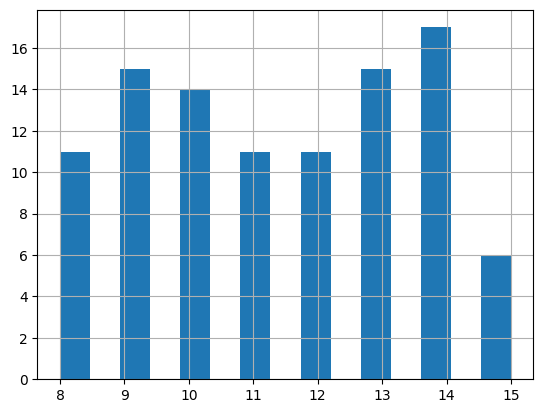

In [9]:

df.國文.hist(bins=15)

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

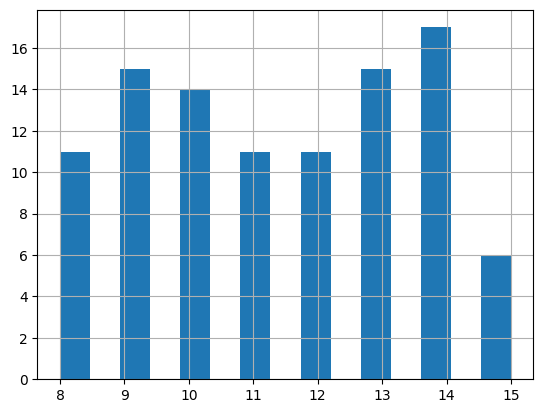

In [10]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [11]:
df.國文.mean()

np.float64(11.39)

算標準差。

In [12]:
df.國文.std()

np.float64(2.196852661459484)

不如就該算的都幫我們算算...

In [13]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [14]:
# Q: 如果在使用 df.corr() 來計算 DataFrame 中欄位的相關係數時
# 或是使用 sum() 函數或其他類似函數時，有出現 "TypeError"。

# A: 主要是因為新版本Pandas有更新函式的 numeric_only 參數預設值為 False
# 所以當 DataFrame 中含有非數值類型的列，這些非數值列（被稱為 "nuisance columns"）將不會被默認忽略，就會引發 TypeError。
# 因此程式需將numeric_only參數，設定為True
# df.corr(numeric_only=True)
# df["總級分"] = df.sum(axis=1, numeric_only=True)

df.corr(numeric_only=True)

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [15]:
df.國文.corr(df.數學)

np.float64(-0.3108989822179331)

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [16]:
df["總級分"]=df.sum(axis=1, numeric_only=True)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [17]:
#加權計算
df["加權"] = df.國文+df.英文+df.數學*2
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [18]:
#排序ascending=True為遞增
df.sort_values(by="總級分",ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
12,李正偉,11,15,11,14,15,66,48
80,施雅鈴,13,15,12,13,13,66,52
37,曾怡君,11,12,15,13,14,65,53
25,蔡亦瑄,13,13,14,13,12,65,54
54,陳怡潔,15,15,9,15,11,65,48
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51
64,俞志峰,9,14,13,14,15,65,49
48,陳怡婷,15,14,12,9,15,65,53
57,胡淳茜,12,15,14,13,11,65,55


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [19]:
#多條件排序
df2=df.sort_values(by=["加權","總級分"],ascending=False)

### 【重點】重設 index

In [20]:
#排序完後index重新設定1~100
df2.head()
df2.index = range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [21]:
#注意要使用雙等於才是判斷不是指派
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [22]:
df2[(df2.數學==15) & (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [23]:
#df2.drop("總級分",axis=1)沒有更改到drop, 
# method1 :需要指派
#df2 = df2.drop("總級分",axis=1)
# method2: inplace=Tru
#df2.drop("總級分",axis=1, inplace=True)
df2.drop("總級分",axis=1)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [24]:
df2.drop("總級分",axis=1, inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [25]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [26]:
df2.drop(df2[df2.姓名=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [28]:

#解決ModuleNotFoundError: No module named ‘distutils‘
#pip install setuptools並重開VS

# import pandas_datareader as pdr
# df = pdr.get_data_yahoo('AAPL')    
# 這個錯誤信息顯示在使用 pandas_datareader 從 Yahoo Finance 獲取數據時，
# 出現了 AttributeError: 'NoneType' object has no attribute 'group' 的問題，
# 這通常是由於 pandas_datareader 無法正確從 Yahoo Finance 獲取的數據(似乎是套件不支援了)

import yfinance as yf
df=yf.download('AAPL', start="2022-01-01", end="2023-01-01")
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.481125   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.203217   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.489639   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.610184   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.777817   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  130.782578   
2022-12-27  131.380005  131.410004  128.720001  130.029999  128.967514   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.010132   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.550949   
2022-12-30  128.410004  129.949997  127.430000  129.929993  128.868317   

               Volume  
Date         

In [ ]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
#df = pd.read_csv('data/aapl.csv', index_col="Date")

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610184,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777817,86709100


#### 只要最後 300 個交易日!

In [30]:
df=df[-300:]
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610184,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777817,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.782578,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.967514,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.010132,85438400


#### 20 日的移動平均

<Axes: xlabel='Date'>

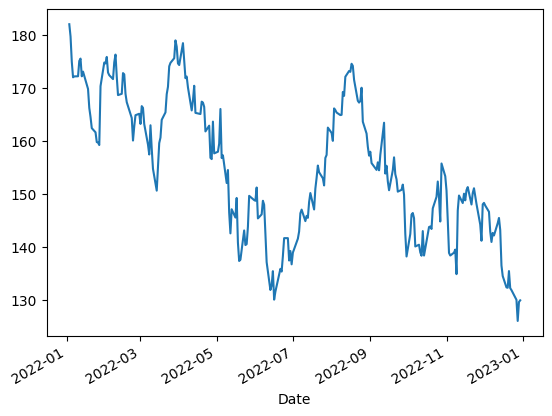

In [31]:

df.Close.plot()


<Axes: xlabel='Date'>

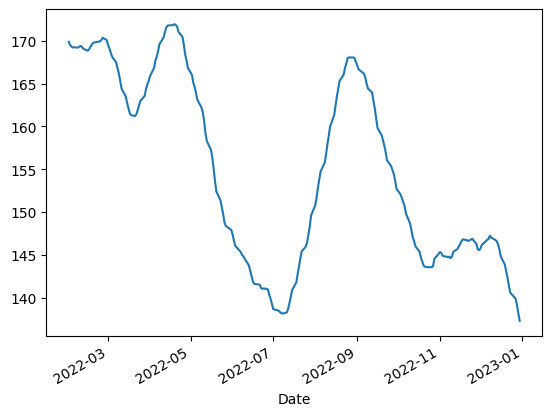

In [32]:
#20日移動平均
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

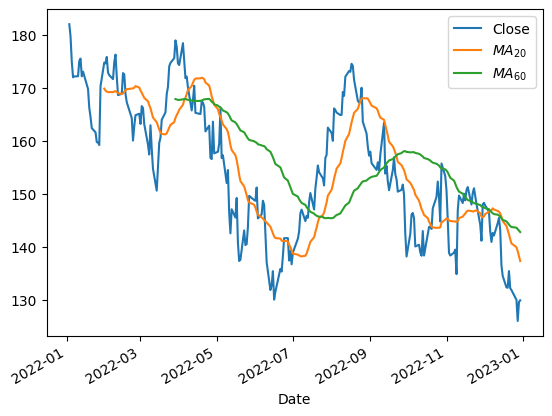

In [33]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [34]:
close = df.Close.values
len(close)

251

In [35]:
x = close[:-1]
x

array([182.00999451, 179.69999695, 174.91999817, 172.        ,
       172.16999817, 172.19000244, 175.08000183, 175.52999878,
       172.19000244, 173.07000732, 169.80000305, 166.22999573,
       164.50999451, 162.41000366, 161.61999512, 159.77999878,
       159.69000244, 159.22000122, 170.33000183, 174.77999878,
       174.61000061, 175.83999634, 172.8999939 , 172.38999939,
       171.66000366, 174.83000183, 176.27999878, 172.11999512,
       168.63999939, 168.88000488, 172.78999329, 172.55000305,
       168.88000488, 167.30000305, 164.32000732, 160.07000732,
       162.74000549, 164.8500061 , 165.11999512, 163.19999695,
       166.55999756, 166.22999573, 163.16999817, 159.30000305,
       157.44000244, 162.94999695, 158.52000427, 154.72999573,
       150.61999512, 155.08999634, 159.58999634, 160.61999512,
       163.97999573, 165.38000488, 168.82000732, 170.21000671,
       174.07000732, 174.72000122, 175.6000061 , 178.96000671,
       177.77000427, 174.61000061, 174.30999756, 178.44

In [36]:
y = close[1:]
y

array([179.69999695, 174.91999817, 172.        , 172.16999817,
       172.19000244, 175.08000183, 175.52999878, 172.19000244,
       173.07000732, 169.80000305, 166.22999573, 164.50999451,
       162.41000366, 161.61999512, 159.77999878, 159.69000244,
       159.22000122, 170.33000183, 174.77999878, 174.61000061,
       175.83999634, 172.8999939 , 172.38999939, 171.66000366,
       174.83000183, 176.27999878, 172.11999512, 168.63999939,
       168.88000488, 172.78999329, 172.55000305, 168.88000488,
       167.30000305, 164.32000732, 160.07000732, 162.74000549,
       164.8500061 , 165.11999512, 163.19999695, 166.55999756,
       166.22999573, 163.16999817, 159.30000305, 157.44000244,
       162.94999695, 158.52000427, 154.72999573, 150.61999512,
       155.08999634, 159.58999634, 160.61999512, 163.97999573,
       165.38000488, 168.82000732, 170.21000671, 174.07000732,
       174.72000122, 175.6000061 , 178.96000671, 177.77000427,
       174.61000061, 174.30999756, 178.44000244, 175.05

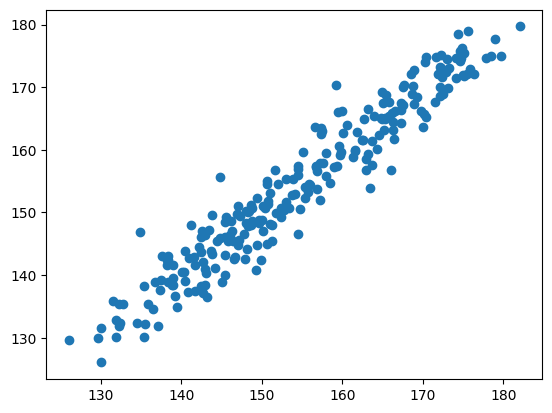

In [37]:

plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [38]:
mydata = np.random.randn(4,3)

In [39]:

mydata 

array([[ 1.7466986 ,  0.80020447, -0.58364933],
       [ 1.12708155, -0.23768895, -0.97268459],
       [ 1.56786279, -0.11733069, -0.33392554],
       [ 0.5705938 , -0.08196381, -1.97944235]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [40]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [41]:
df2

,A,B,C
0,1.746699,0.800204,-0.583649
1,1.127082,-0.237689,-0.972685
2,1.567863,-0.117331,-0.333926
3,0.570594,-0.081964,-1.979442


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [42]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))


In [43]:
df3

,A,B,C
0,-0.726884,-1.927396,1.751196
1,0.195300,0.253008,1.061908
2,-0.093548,-0.229854,-0.332033


In [44]:

#參數: df4=pd.concat(,,,,,)
#合併資料: df4=pd.concat([,],,,])
df4=pd.concat([df2,df3], axis=0)


In [45]:
df4

,A,B,C
0,1.746699,0.800204,-0.583649
1,1.127082,-0.237689,-0.972685
2,1.567863,-0.117331,-0.333926
3,0.570594,-0.081964,-1.979442
0,-0.726884,-1.927396,1.751196
1,0.195300,0.253008,1.061908
2,-0.093548,-0.229854,-0.332033


前面我們弄得亂七八糟的 index 重設一下。

In [46]:
df4.index = range(7)

In [47]:
df4

,A,B,C
0,1.746699,0.800204,-0.583649
1,1.127082,-0.237689,-0.972685
2,1.567863,-0.117331,-0.333926
3,0.570594,-0.081964,-1.979442
4,-0.726884,-1.927396,1.751196
5,0.195300,0.253008,1.061908
6,-0.093548,-0.229854,-0.332033


#### 横向的貼

In [48]:
df5=pd.concat([df2,df3], axis=1)
df5

,A,B,C,A,B,C
0,1.746699,0.800204,-0.583649,-0.726884,-1.927396,1.751196
1,1.127082,-0.237689,-0.972685,0.195300,0.253008,1.061908
2,1.567863,-0.117331,-0.333926,-0.093548,-0.229854,-0.332033
3,0.570594,-0.081964,-1.979442,NaN,NaN,NaN


等等, 這大小好像不太對也可以嗎? 答案是可以的!

#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [49]:
df_names=pd.read_csv("data/names.csv",names=["姓名"])
#df_names.head()
df_grads=pd.read_csv("data/grades2.csv")
df_names
df_grads

,國文,英文,數學,社會,自然
0,6,15,15,9,13
1,8,9,11,13,6
2,15,15,7,12,8
3,12,15,7,12,7
4,9,6,14,6,14
...,...,...,...,...,...
95,10,9,15,6,7
96,8,13,6,12,11
97,11,11,14,15,9
98,14,7,7,14,12


In [50]:
#df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),columns=["國文","英文","數學","社會","自然"])
#df_grades

In [51]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [52]:
#index=0就不會存index
#df_grades.to_csv("data/grades2.csv", index=0)

In [53]:
df_grades

,國文,英文,數學,社會,自然
0,11,15,8,13,11
1,6,11,6,9,7
2,12,14,11,7,12
3,10,15,9,8,9
4,14,6,15,10,14
...,...,...,...,...,...
95,6,15,7,13,13
96,13,9,12,11,12
97,13,6,13,15,10
98,12,11,6,7,8


In [54]:
df_scores = pd.concat([df_names, df_grades],axis=1)
df_scores

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,11,15,8,13,11
1,王紹尹,6,11,6,9,7
2,黃季坤,12,14,11,7,12
3,許正書,10,15,9,8,9
4,張鈞蓮,14,6,15,10,14
...,...,...,...,...,...,...
95,陳君生,6,15,7,13,13
96,曾桂甫,13,9,12,11,12
97,林欣怡,13,6,13,15,10
98,林佳霖,12,11,6,7,8
